Universidad Nacional de Colombia.

Javier Andrés Mariño Villalba.


# Regresión Lineal

## 1. Introducción:

La ciencia se erige sobre un concepto matemático fundamental: la función. Encontrar la relación  que se establece entre dos o más variables es el objetivo de cualquier ciencia- natural o social. Mientras los físicos buscan establecer la relación entre la masa y la fuerza, los sociólogos buscan establecer la  relación entre la pobreza y la delincuencia en un país. Nadie se escapa de las funciones. 

Ahora bien, puesto que la naturaleza de las relaciones, en su mayoría, no es determinística, no es posible ni conveniente establecer una relación del tipo $y=ax+b$. La estadística proporciona una solución que incluye un componente estocástico: la regresión. Aquí ya no se establece una relación entre variables de las cuales se conoce su estado en todo momento, sino una relación entre variables aleatorias. 

El objetivo del presente ensayo es mostrar de manera breve la importancia de la regresión. Aunque han pasado años desde que Gauss proporcionó sus fundamentos, hoy por hoy sigue siendo uno de los pilares de la estadística moderna. Las series de tiempo, los datos panel, la evaluación de impacto, la inteligencia artificial, entre otros, se fundamentan en la idea de Gauss.

## 2. Breve historia

No profundizaré demasiado en la historia de la regresión. La regresión tiene su orígen, aunque primitivo, en los albores del siglo XIX. Legendre y Gauss, como se puede leer en [Wikipedia](https://es.wikipedia.org/wiki/Regresi%C3%B3n_lineal), formularon el método de mínimos cuadrados ordinarios y, en especial Gauss, presentó una primera versión del conocido teorema de Gauss-Markov. La regresión no surgió de una indigación teórico, puramente matemática o estadística, sino de una aplicación práctica. Legendre y Gauss estaban interesados en la predicción del movimiento planetario.

El término, tal y como lo conocemos hoy, fue acuñado por Francis Galton para describir un fenómenos biológico. Mientras que el no tan conocido matemático belga, Adolphe Quetelet, difundió las especificidades del método matemático asociado a la regresión. Finalmente, fue Robert Fisher, el padre de la estadística frecuentista, quien terminaría por asociar la regresión con conceptos formales como la distribución condicional de probabilidad. 





## 3. El algoritmo

El algoritmo asociado a la regresión, deducido del método de mínimos cuadrados ordinarios, no es difícil de encontrar. A continuación se presentará con algún detalle el algoritmo de la regresión lineal simple. Deseamos minimizar los errores de la regresión que pueden ser escritos de la siguiente forma:

$$\sum\limits_{i=1}^n \left(e_i \right)^2= \sum \left(y_i - \beta_0 - \beta_1x_i\right)^2$$ 

Optimizamos, de manera que derivamos e igualamos a cero con respecto a los parámetros: 

$$\frac{\partial{}}{\partial{\beta_0}} =- \sum 2\left(y_i - \beta_0 - \beta_1x_i\right) = 0$$
$$\sum \left(y_i - \beta_0 - \beta_1x_i\right) = 0 $$
$$\beta_0 = \bar y - \beta_1 \bar x  $$

$$\frac{\partial{}}{\partial{\beta_1}} = \sum 2\left(y_i - \beta_0 - \beta_1x_i\right) (-x_i) = 0$$ 
$$\sum x_i \left(y_i - \beta_0 - \beta_1x_i\right) = 0$$
$$\sum x_iy_i - \beta_0 \sum x_i - \beta_1 \sum x_i^2 = 0 $$
Ahora substituimos los dos resultados anteriores así: 
$$\sum x_iy_i - \left( \frac{1}{n}\sum y_i -\beta_1 \frac{1}{n}\sum x_i\right) \sum x_i - \beta_1 \sum x_i^2 = 0 $$
$$\sum x_iy_i - \frac{1}{n} \sum x_i \sum y_i  =  \beta_1 \left(\sum x_i^2 - \frac{1}{n} \left( \sum x_i \right) ^2 \right) $$
$$\beta_1  = \frac{\sum x_iy_i - \frac{1}{n} \sum x_i \sum y_i}{\sum x_i^2 - \frac{1}{n} \left( \sum x_i \right) ^2 } = \frac{cov(x,y)}{var(x)}$$ 



Las ecuaciones fueron tomadas de [StackChange](https://math.stackexchange.com/posts/717552/edit).

Una buena forma de entender las ecuaciones anteriores es con imágenes. Los parámetros calculados sirven aquí como los parámetros de las funciones de los que hablamos en un principio. Son los que proporcionan el mejor ajuste al conjunto de datos sobre los que queremos encontrar una relación. 

<img src=https://economipedia.com/wp-content/uploads/Regresi%C3%B3n-lineal.png width="200"/> <img src="regresion.png" width="200"/>

## 4. Ejemplo con datos reales. 

A continuación presentaremos un ejemplo real de la utilización de la regresión. Queremos, en este ejemplo, establecer la relación entre el número de ciclistas por una semana -en un conjunto de 27 ciudades- y el precio por semana de montar bicicleta por semana, la población de la ciudad, el ingreso promedio de los ciclistas y la tasa promedio de parqueo para ciclistas por mes. 

En primer lugar, debemos importar las librerías de python que necesitamos importar: numpy, pandas  y matplotlib. Posteriormente, con ayuda de la librería pandas cargamos nuestra base de datos. 

In [69]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
from mpl_toolkits.mplot3d import Axes3D
from matplotlib import cm
plt.rcParams['figure.figsize'] = (16, 9)
plt.style.use('ggplot')
from sklearn import linear_model
data = pd.read_csv("./regresion1.csv", delimiter=";")

En segundo lugar, estableceremos el número observaciones (ciudades) y el número de variables. Nos encontramos con que hay 28 ciudades en este estudio y 5 variables (sin contar el numerador de las ciudades).

In [70]:
data.shape

(27, 6)

En tercer lugar, calculamos algunas estadísticas descriptivas importantes de las variables que se utilizarán en la regresión.

In [71]:
data.describe()

,City,Number of weekly riders,Price per week,Population of city,Monthly income of riders,Average parking rates per month
count,27.000000,27.000000,27.000000,2.700000e+01,27.000000,27.000000
mean,14.000000,160026.074074,49.925926,1.680111e+06,11063.259259,107.037037
std,7.937254,21301.097303,27.627921,6.780307e+04,3416.627944,45.346089
min,1.000000,115696.000000,15.000000,1.590000e+06,5800.000000,50.000000
25%,7.500000,149600.000000,27.500000,1.617500e+06,8400.000000,75.000000
50%,14.000000,161600.000000,40.000000,1.695000e+06,11600.000000,100.000000
75%,20.500000,176000.000000,75.000000,1.725000e+06,13888.000000,140.000000
max,27.000000,192000.000000,102.000000,1.800000e+06,16200.000000,200.000000


En cuarto lugar, establecemos las variables independientes como una matriz con ayuda de numpy y, posteriormente, creamos una variable con los datos de la variable dependiente. 

In [72]:
dataX =data[['Price per week','Population of city','Monthly income of riders','Average parking rates per month']]
price_per_week=data['Price per week']
X_train = np.array(dataX)
y_train = data['Number of weekly riders']

Para ilustar, presentamos la relación gráfica, que nos da muestras, de la correlación entre dos variables. En este caso entre la variable número de ciclistas por semana y precio por semana para los ciclistas. La relación se corresponde con la lógica, pues aumentos de precios disminuyen el número de ciclistas en cada ciudad.

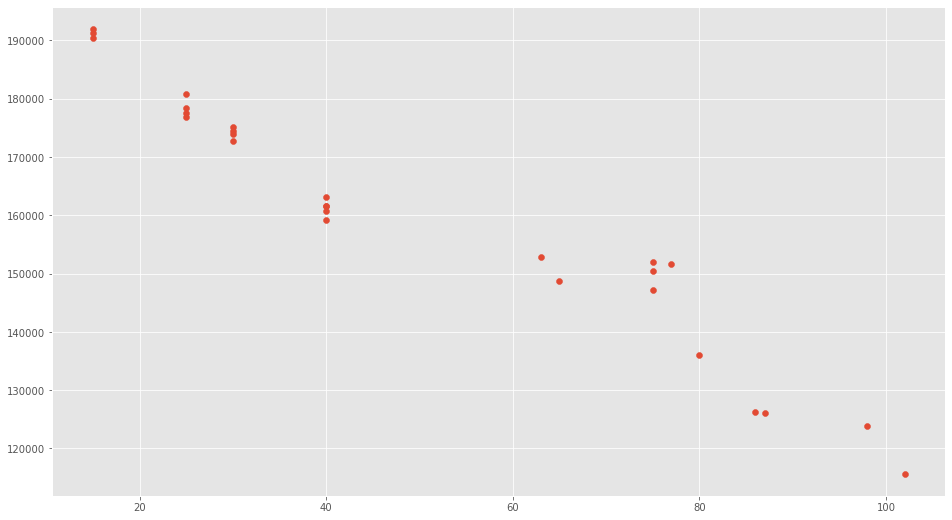

In [73]:
plt.scatter(price_per_week, y_train)

Finalmente, con ayuda de la librería sklearn establecemos la regresión lineal. Para luego calcular los coeficientes de la regresión incluido el término independiente.

In [74]:

regr = linear_model.LinearRegression()
 
regr.fit(X_train, y_train)

LinearRegression()

In [75]:

print('Coefficients: \n', regr.coef_)

print('Independent term: \n', regr.intercept_)


Coefficients: 
 [-6.89522723e+02  5.49412800e-02 -1.30136687e+00  1.52456367e+02]
Independent term: 
 100222.56066171998


Los resultados son interesantes. Un aumento del precio de montar bicicleta por semana ocasiona una disminución del número de clistas por semana. A su vez un aumento de la población de las ciudades aumenta el número de ciclitas por semana. Un aumento del  ingreso mensual de los ciclistas disminuye el número de ciclistas por semana. Y un aumento de la tasa de parqueadero aumenta el número de ciclistas por semana.

El código aquí presentado fue una adaptación del presentando en [Aprendamos Machine Learning](https://www.aprendemachinelearning.com/regresion-lineal-en-espanol-con-python/)

## 5. Conclusiones

La regresión lineal sigue más vigente que nunca. La idea de Gauss y Legendre a comienzos del siglo XIX sigue siendo hoy una de las armas predilectas de los estadísticos. Ahora, es una parte importante del aprendizaje de maquinas, de la minería de datos y de otros cuantas áreas de conocimiento. 

Presentamos un pequeño problema que representa el poderío de la regresión. Incluir el concepto de  función con el de aleatoriedad para la solución de un problema científico. Nada más y nada menos que establecer la relación entre dos variables. 

Aunque los lenguajes de programación nos facilitan el cálculo de los parámetros de la regresión, el conocimiento teórico asociado a la regresión sigue siendo fundamental. 

## Bibliografía

[Wikipedia](https://es.wikipedia.org/wiki/Regresi%C3%B3n_lineal)

 [Aprendamos Machine Learning](https://www.aprendemachinelearning.com/regresion-lineal-en-espanol-con-python/)

[StackChange](https://math.stackexchange.com/posts/717552/edit)